### Final  implement Bertopic:
I mostly refer to the follwing github pages and other resources:

*   https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html
*   https://pypi.org/project/bertopic/

*   https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing#scrollTo=y_eHBI1jSb6i






Import packages

In [ ]:
!pip install bertopic numpy matplotlib scikit-learn pandas datashader scikit-image requests jinja2 # numba==0.56.4 need older version of numba for seeded lists in guided topic model
!pip install datamapplot
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import csv
from sentence_transformers import SentenceTransformer
from umap import UMAP
import os
from hdbscan import HDBSCAN
import datamapplot





In [ ]:
#path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
#df = pd.read_csv(path_to_csv)

# Extract the "Article_Text" column for the first 20 entries
#df_subset = df['Article_Text'].head(2000)
#df_subset = df['Article_Text'].head(100)

# For DTM need time variable
#df_subset_time = df['Date'].head(100)

#print(df_subset_time)

0     2010-01-17 00:00:00+00:00
1     2010-01-24 00:00:00+00:00
2     2010-01-24 00:00:00+00:00
3     2010-01-31 00:00:00+00:00
4     2010-01-31 00:00:00+00:00
                ...            
95    2015-02-15 00:00:00+00:00
96    2015-02-15 00:00:00+00:00
97    2015-02-22 00:00:00+00:00
98    2015-03-08 00:00:00+00:00
99    2015-03-08 00:00:00+00:00
Name: Date, Length: 100, dtype: object


In [ ]:
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
#embeddings = sentence_model.encode(df_subset, show_progress_bar=True)



#model_path = "content/drive/MyDrive/Colab Notebooks/topic_model"
#topic_model = BERTopic.load(model_path)

#topic_model = BERTopic.load("content/drive/MyDrive/Colab Notebooks/topic_model")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
#freq = topic_model.get_topic_info(); freq.head(5)

# First test

> Blockzitat einfügen



In [ ]:
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
#embeddings = sentence_model.encode(df_subset, show_progress_bar=True)
#from transformers.pipelines import pipeline
#embedding_model = pipeline("feature-extraction", model="climatebert/distilroberta-base-climate-f") ## Use ClimateBert


#seed_topic_list = [["jetp", "partnership", "just energy transition partnership" "ipg", "jetip"],
 #                  ["left", "behind", "vulnerable"]]
                   #["windows", "drive", "dos", "file"],
                   #["space", "launch", "orbit", "lunar"]]

# Train BERTopic
#topic_model = BERTopic(nr_topics="20", seed_topic_list=seed_topic_list).fit(df_subset, embeddings)

#topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True) ## Might make sense to set calculate_probabilities=False if takes to much memory
#topics, probs = topic_model.fit_transform(df_subset)

2024-06-20 09:27:50,286 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-06-20 09:28:12,967 - BERTopic - Embedding - Completed ✓
2024-06-20 09:28:12,969 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-20 09:28:25,464 - BERTopic - Dimensionality - Completed ✓
2024-06-20 09:28:25,466 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-20 09:28:25,486 - BERTopic - Cluster - Completed ✓
2024-06-20 09:28:25,488 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-20 09:28:25,601 - BERTopic - Representation - Completed ✓
2024-06-20 09:28:25,603 - BERTopic - Topic reduction - Reducing number of topics
2024-06-20 09:28:25,608 - BERTopic - Topic reduction - Reduced number of topics from 5 to 5


In [ ]:

# Load the data
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)
df_subset = df['Article_Text']
df_subset_time = df['Date']

# Define UMAP model
umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=True)

# Define HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=35, min_samples=10, metric='euclidean', prediction_data=True)
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(df_subset, show_progress_bar=True)

Batches:   0%|          | 0/248 [00:00<?, ?it/s]

In [ ]:


# Create BERTopic model with specified parameters
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, min_topic_size=40, calculate_probabilities=True, verbose = True)

# Fit the BERTopic model
topics, probs = topic_model.fit_transform(df_subset, embeddings)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.update_topics(df_subset, vectorizer_model=CountVectorizer(stop_words='english', ngram_range=(1, 2)), representation_model = MaximalMarginalRelevance(diversity=0.3))




2024-06-22 11:03:19,568 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-22 11:03:43,402 - BERTopic - Dimensionality - Completed ✓
2024-06-22 11:03:43,405 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-22 11:03:45,194 - BERTopic - Cluster - Completed ✓
2024-06-22 11:03:45,204 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-22 11:03:53,053 - BERTopic - Representation - Completed ✓


In [ ]:
topic_labels = topic_model.get_topic_info()
topic_document = topic_model.get_document_info(df_subset)
topic_labels.to_csv("/content/drive/MyDrive/Colab Notebooks/topic_labels_clustered_final.csv", index = False)
topic_document.to_csv("/content/drive/MyDrive/Colab Notebooks/document_topic_document_clustered_final.csv", index = False)

In [ ]:
print(topic_labels)
print(topic_document)

    Topic  Count                                    Name  \
0      -1   3367                        -1_the_of_and_to   
1       0    497                0_transnet_rail_the_port   
2       1    278              1_strike_workers_union_the   
3       2    266                2_climate_change_the_and   
4       3    218                   3_power_eskom_to_load   
5       4    217                         4_the_of_and_to   
6       5    207           5_energy_wind_solar_renewable   
7       6    180                      6_water_the_of_and   
8       7    175                      7_the_in_growth_of   
9       8    162              8_optimum_the_eskom_tegeta   
10      9    149                  9_percent_to_index_the   
11     10    144                   10_sasol_fuel_oil_the   
12     11    131                11_air_pollution_the_and   
13     12    100                    12_mining_the_and_to   
14     13    100                     13_the_and_music_at   
15     14     97             14_gas_shal

In [ ]:
topic_model.visualize_barchart(top_n_topics = 50, n_words = 20)

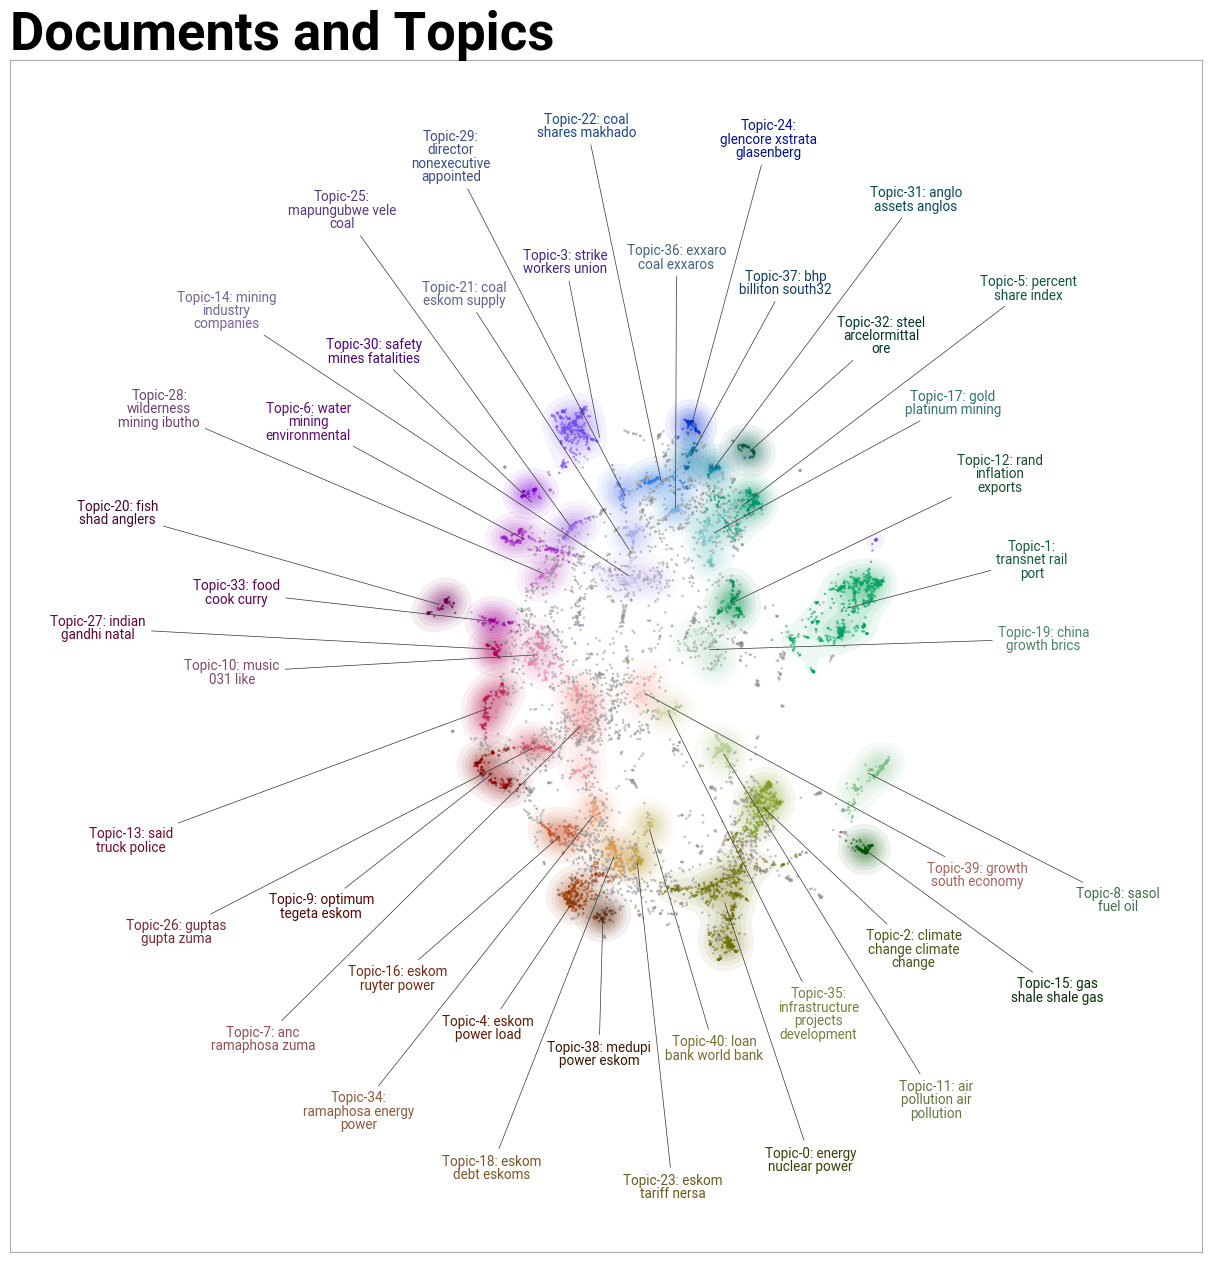

In [ ]:
topic_model.visualize_document_datamap(df_subset, reduced_embeddings=reduced_embeddings) # , custom_labels=custom_labels
topic_model.visualize_hierarchy()

In [ ]:
# Merge topic groups
topics_to_merge = [
    [26, 9], # state capture and corruotion
    [10, 13, 20, 27, 33], # irrelevant
    [5, 14, 17, 22, 24, 29, 31, 32, 36, 37], # Mining business
    [8, 15], # gas oil
    [16,34], # Eskom crisis - governance
    [18,23], # Eskom crisis - financing
]
topic_model.merge_topics(df_subset, topics_to_merge)

In [ ]:
# Merge topic groups
topics_to_merge = [
    [14, 15], # Numbers incorrect, only apply to after first merge!! changed after that
    [23, 20], # Numbers incorrect, only apply to after first merge!! changed after that
]
topic_model.merge_topics(df_subset, topics_to_merge)

In [ ]:
# Merge topic groups
topics_to_merge = [
    [17, 18], # Numbers incorrect, only apply to after second merge!! changed after that
]
topic_model.merge_topics(df_subset, topics_to_merge)

In [ ]:
topic_model.visualize_barchart(top_n_topics = 50, n_words = 20)


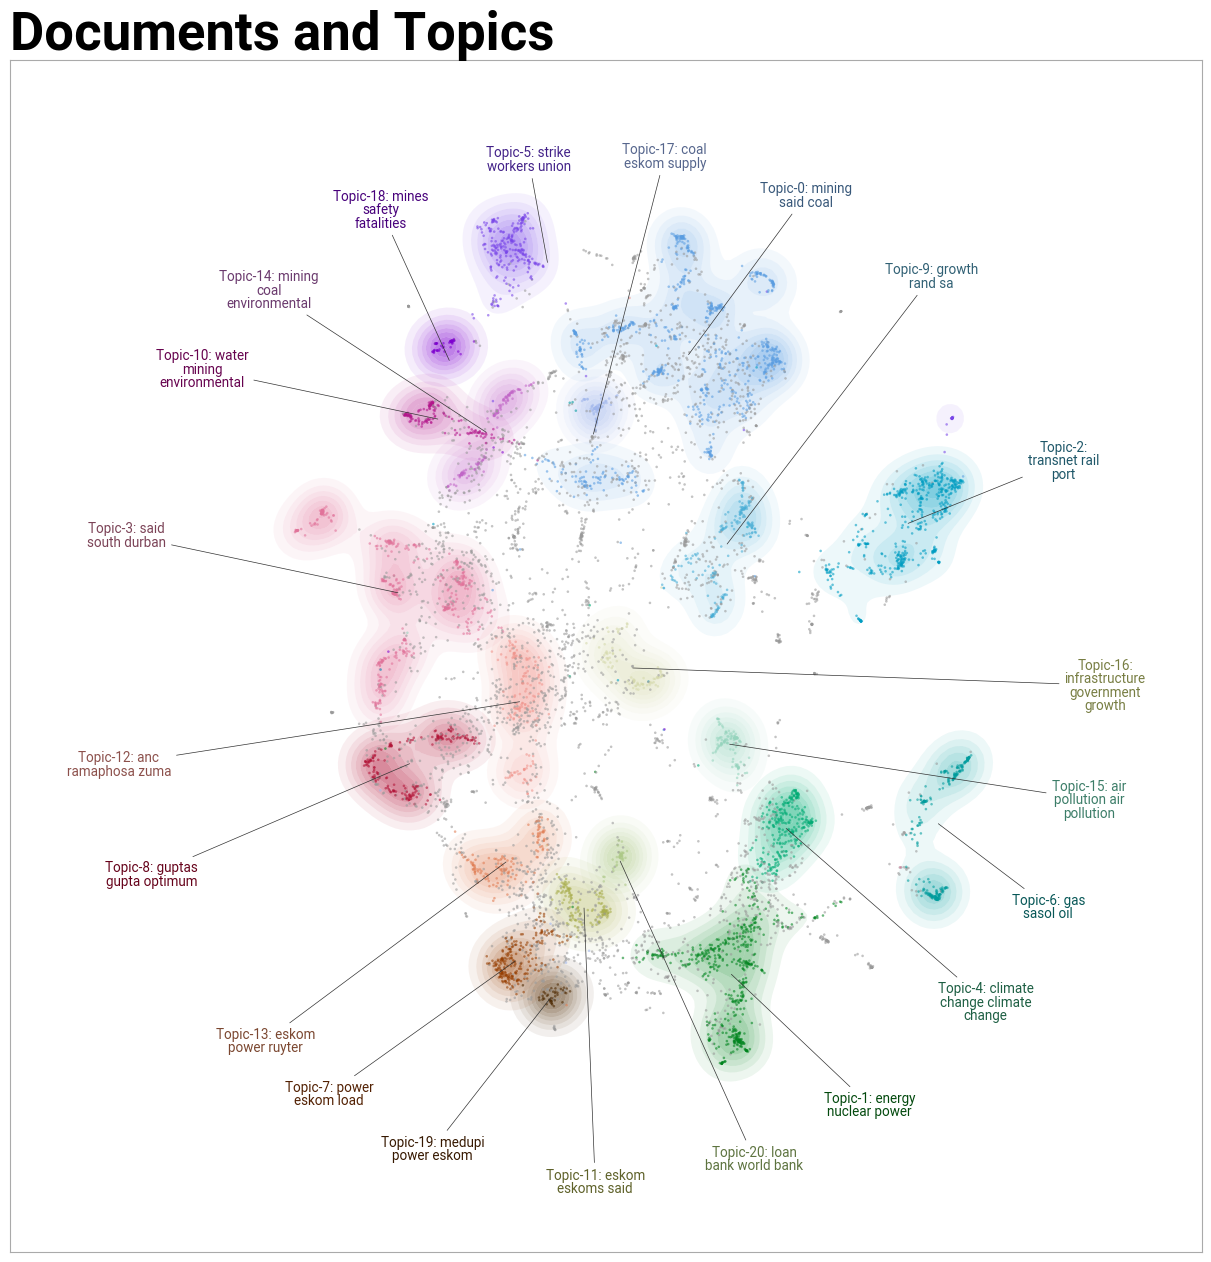

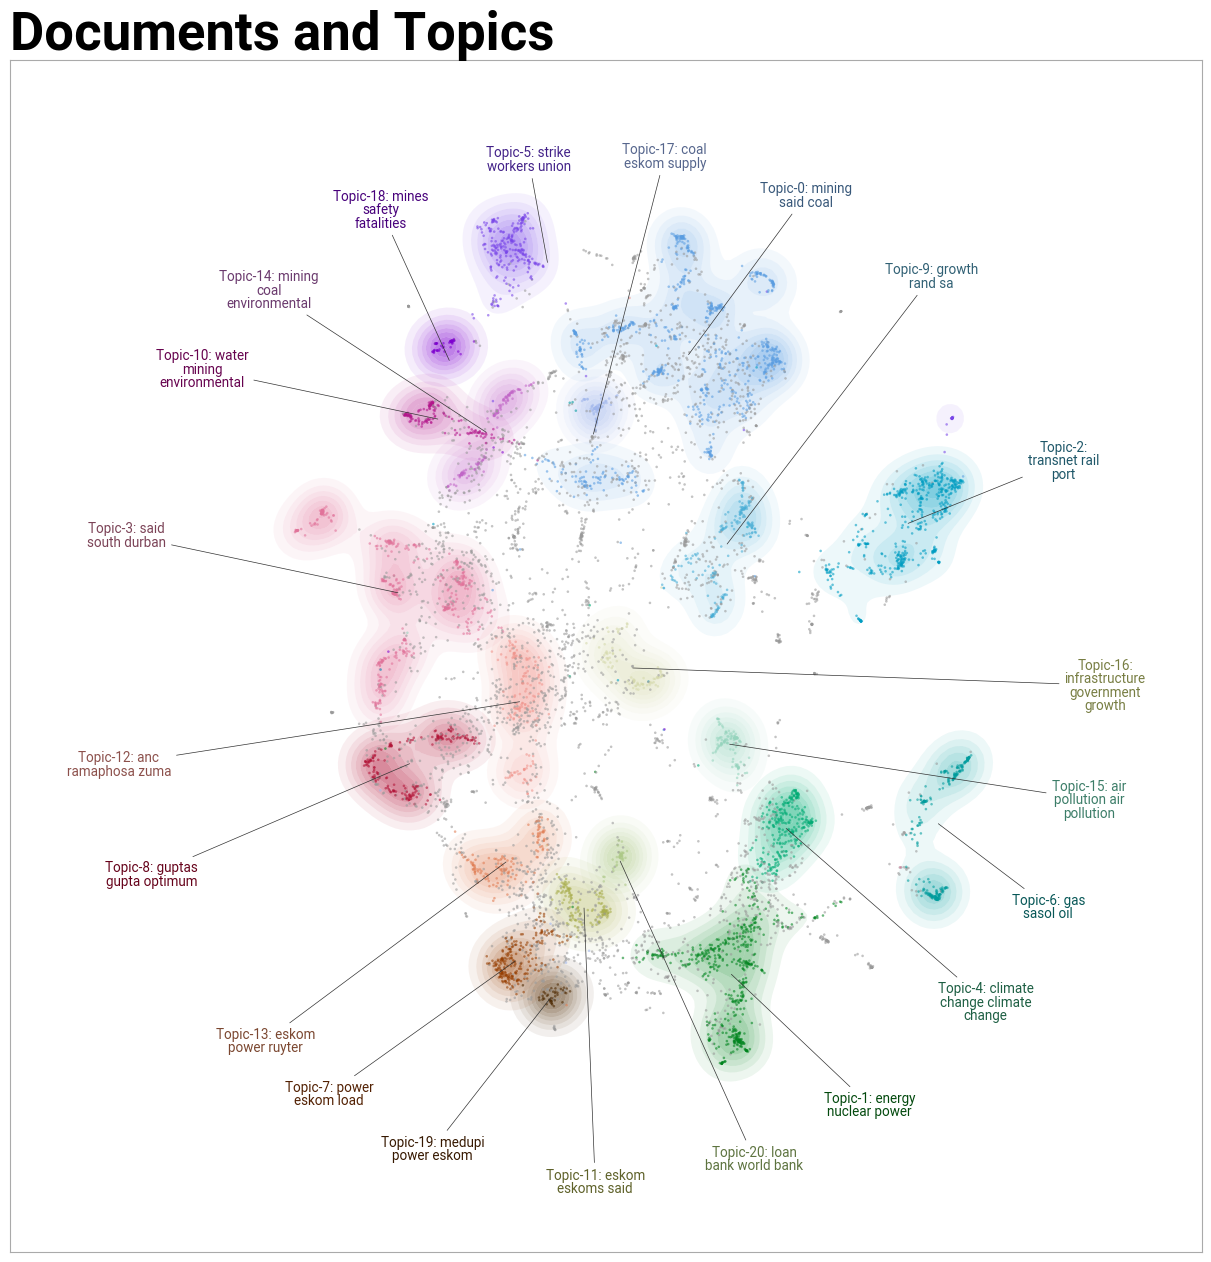

In [ ]:
# check again result:
topic_model.visualize_barchart(top_n_topics = 50, n_words = 20)
topic_model.visualize_document_datamap(df_subset, reduced_embeddings=reduced_embeddings) # , custom_labels=custom_labels


In [ ]:
#topic_model.set_topic_labels({0: "wawawaw", 1: "Space Travel", 2: "Religion"})
topic_model.set_topic_labels({0: "Mining business& market dynamics", 1: "Renewable & nuclear energy", 2: "Coal transport", 3: "Irrelevant",
                              4: "Transition politics & finance", 5: "Mining labor issues", 6: "Oil & gas", 7: "Eskom crisis - loadshedding", 8: "State capture & corruption",
                              9: "Foreign trade", 10: "Environmental damages of mining", 11: "Eskom crisis - financing",
                              12: "Daily political business", 13: "Eskom crisis - governance", 14: "Mining on protected land", 15: "Air pollution", 16: "Economic development",
                              17: "Eskom's coal supply", 18: "Mining safety", 19: "Coal plant construction", 20: "World bank loan"})



In [ ]:
topic_model.visualize_barchart(top_n_topics = 50, n_words = 20, custom_labels=custom_labels)

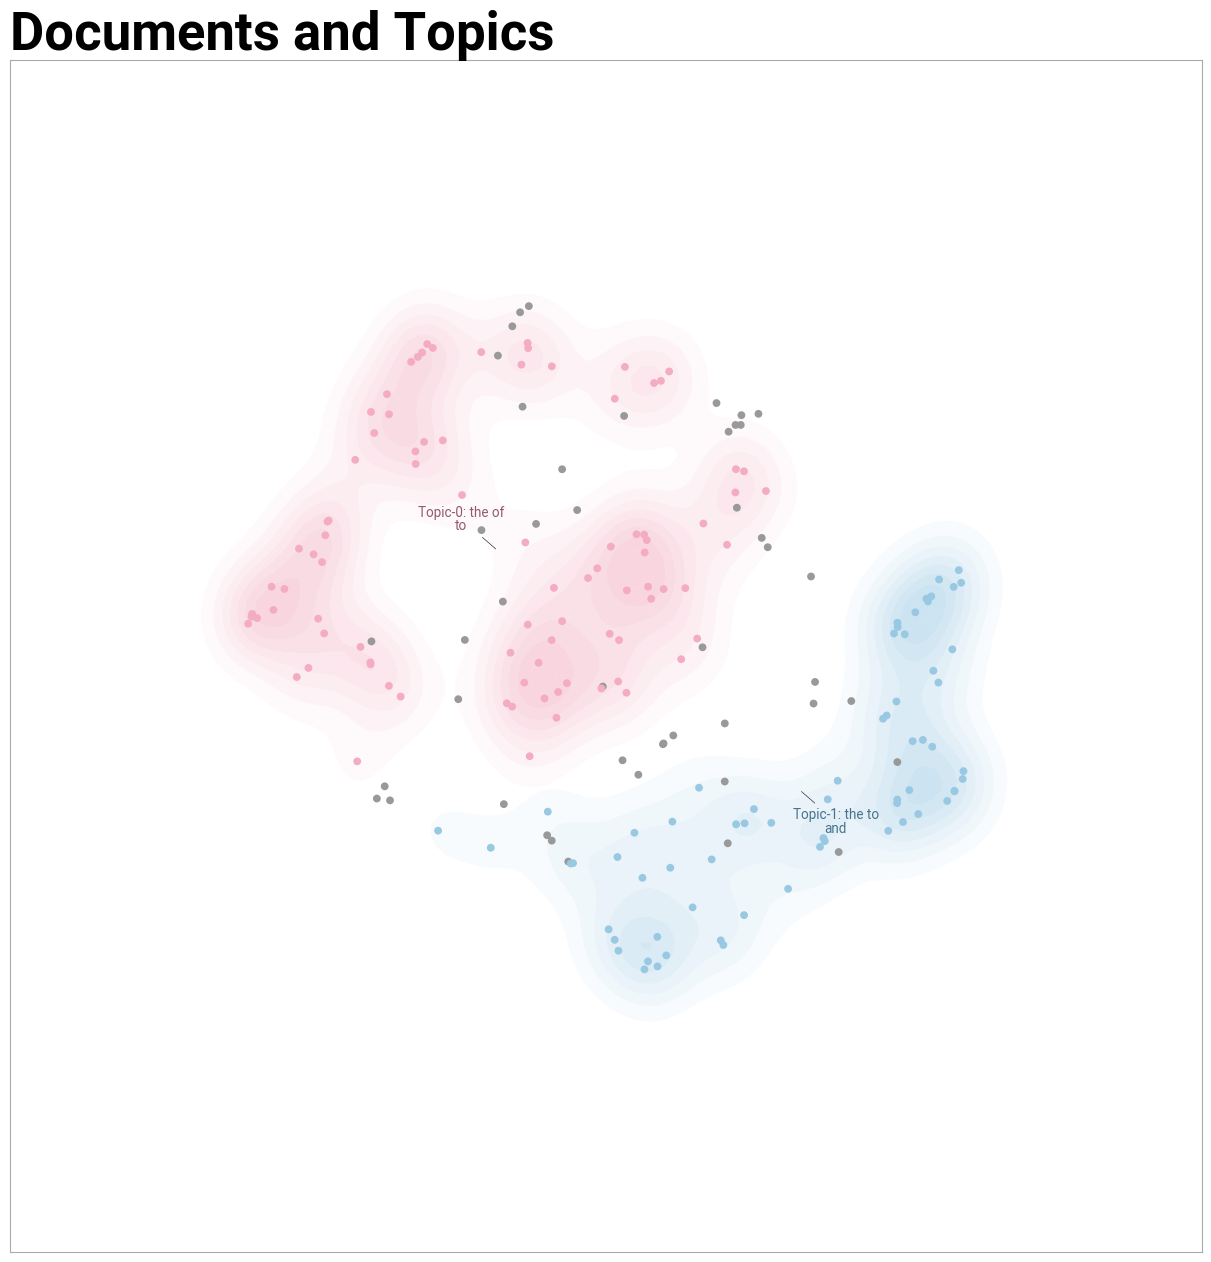

In [ ]:
topic_model.visualize_document_datamap(df_subset, reduced_embeddings=reduced_embeddings) # , custom_labels=custom_labels


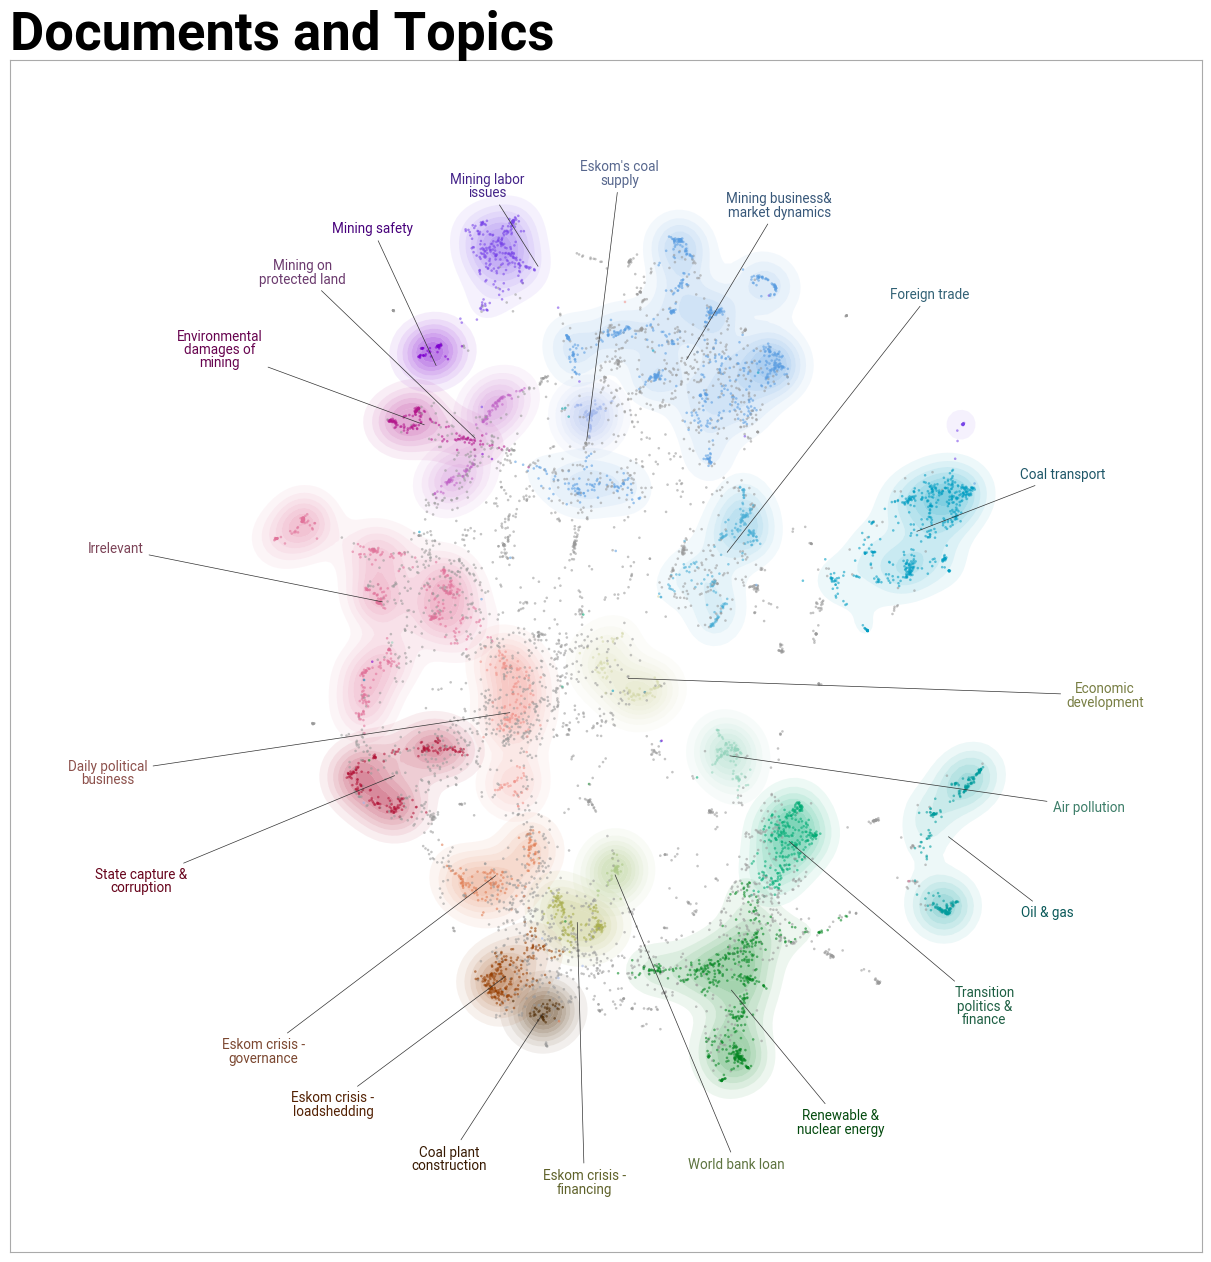

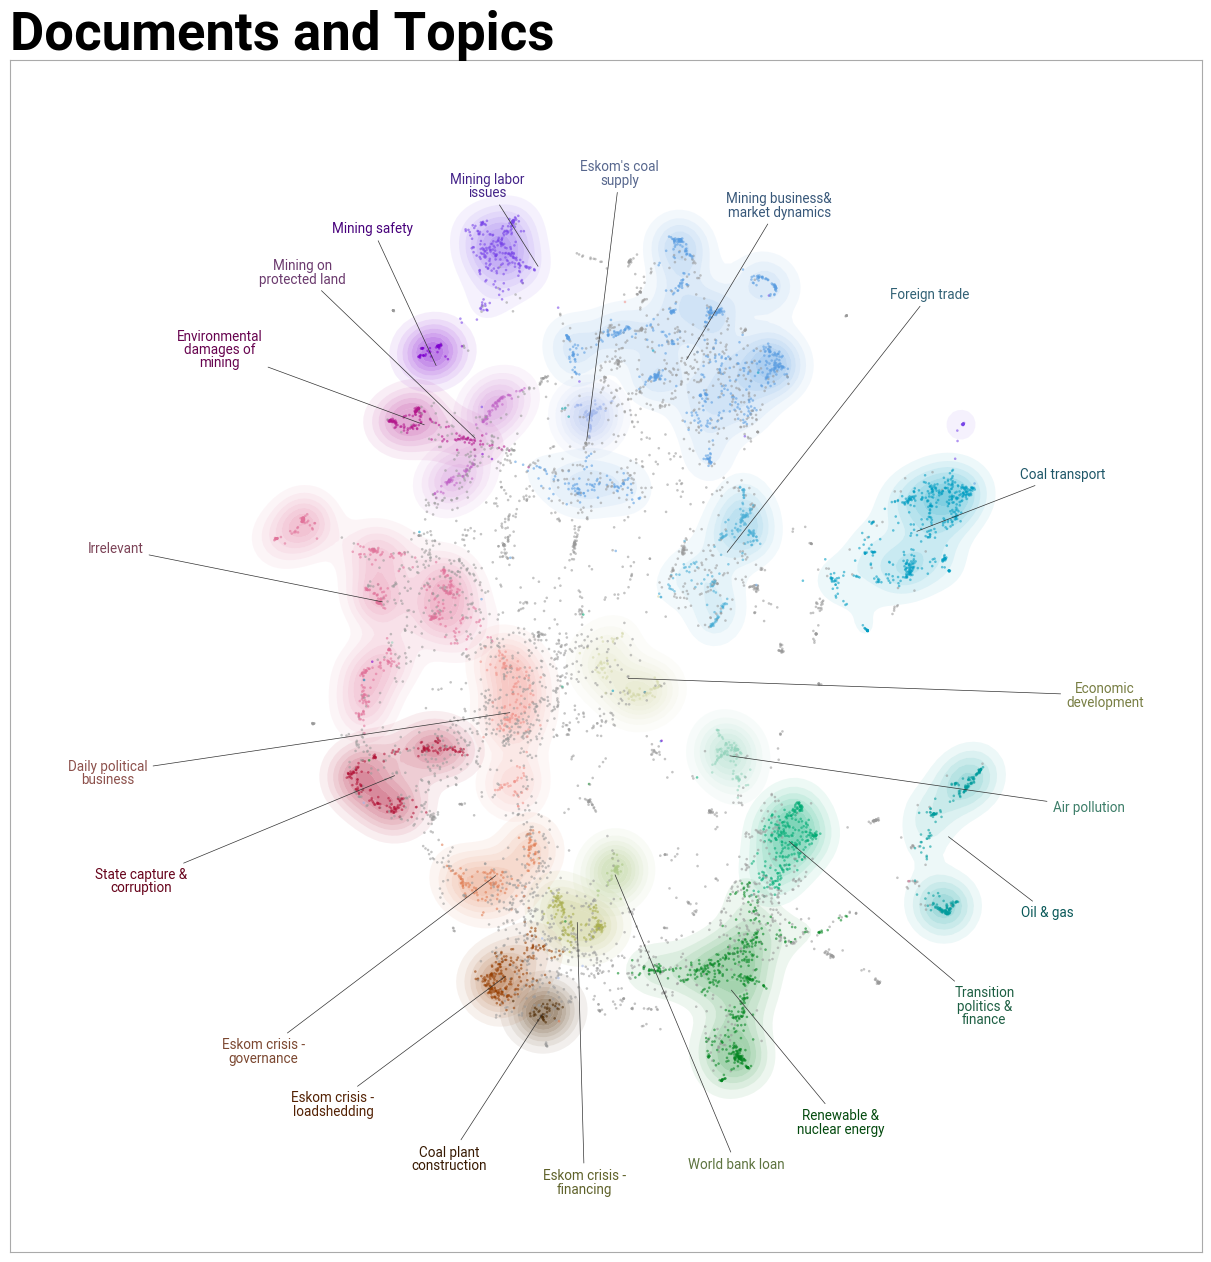

In [ ]:
topic_model.visualize_document_datamap(df_subset, reduced_embeddings=reduced_embeddings, custom_labels=custom_labels) # , custom_labels=custom_labels


In [ ]:
topics_over_time = topic_model.topics_over_time(df_subset, df_subset_time, nr_bins=20) #
topic_model.visualize_topics_over_time(topics_over_time, custom_labels=True) # Eventually normalize? normalize_frequency	= True

20it [15:52, 47.60s/it]


In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000, custom_labels=True)

In [ ]:
topic_model.get_representative_docs(17)

['We question. the coal-mining company due to start work near heritage site, the Mapungubwe National Park in Limpopo. Environmental activists are up in arms due to coal-mining operations set to take place near the Mapungubwe National Park in Limpopo, saying mining operations will pollute the area\\\'s water and disturb its biodiversity.  Coal of Africa (CoAL), has signed a letter of intent to supply up to five million tonnes of coal annually from Vele, and its sister project Makhado, to steel giant Arcelor Mittal. Read our article.We put a few questions to CoAL CEO John Wallington.What is CoAL\\\'s reaction to environmentalist comment to stop mining operations near the Mapungubwe National Park? How will environmental conservation issues be taken into account?Coal of Africa (CoAL) Limited welcomes the environmentalist\\\'s reaction to the Vele Colliery Project as they are Interested and Affected Parties (IAP\\\'s) in the area. Coal of Africa Ltd is aware of the rich cultural heritage wh

#Save model

In [ ]:
# Path to save the model
model_save_path = "/content/drive/MyDrive/Colab Notebooks/topic_model_optimized3_1"

# Ensure the directory exists
if not os.path.exists(os.path.dirname(model_save_path)):
    os.makedirs(os.path.dirname(model_save_path))

# Save the model
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save(model_save_path, serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

# Confirm the file was saved
if os.path.exists(model_save_path):
    print(f"Model successfully saved at {model_save_path}")
else:
    print("Failed to save the model. Please check the path and permissions.")


### Load the model

In [ ]:
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)
df_subset = df['Article_Text']
df_subset_time = df['Date']

In [ ]:
# Absolute path to the saved model
model_load_path = "/content/drive/MyDrive/Colab Notebooks/topic_model_optimized3"

# Load the saved BERTopic model
topic_model = BERTopic.load(model_load_path)

# Assuming you have your document data in a list called `documents`
documents = df_subset

# Transform the documents to get topics
topics, probs = topic_model.transform(documents)

# Print the topics for the documents
for doc, topic in zip(documents, topics):
    print(f"Document: {doc} \nTopic: {topic}\n")


Batches:   0%|          | 0/248 [00:00<?, ?it/s]

2024-06-21 10:05:26,921 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
topic_model.update_topics(df_subset, vectorizer_model=CountVectorizer(stop_words='english', ngram_range=(1, 2)), representation_model = MaximalMarginalRelevance(diversity=0.3))


In [ ]:
if hasattr(topic_model, 'embedding_model') and topic_model.embedding_model is not None:
    print("Embeddings are present in the model.")
else:
    print("Embeddings are not present in the model.")

Embeddings are present in the model.


In [ ]:
embedddings = topic_model.embedding_model

Get topic/document information

In [ ]:
topic_model.get_representative_docs(topic=3)

['The government has introduced a range of ways to address Eskom\\\'s woes WHAT IS BROKEN The domino effect of stage four power cuts this week — which stripped consumers not only of electricity, but of water and telecommunications in some areas as well — was a stark reminder of South Africa\\\'s utter reliance on embattled power utility Eskom. Eskom officials and the department of public enterprises outlined the problems facing the parastatal this week. Cyclone-related damage to power lines from Cahora Bassa in Mozambique, which supplies about 1000 megawatts (MW) of power, and Eskom\\\'s ageing plant are just some of the reasons for the power outages. As a result of planned maintenance and unplanned tripping, about 17000MW of capacity was unavailable. A key reason has been boiler tube leaks, which have crippled seven power-generation units. The use of open-cycle gas turbines, intended to meet peak demand, has skyrocketed recently, and spending on diesel has reached almost R5-billion. E

In [ ]:
 # Select the most frequent topic
topic_model.get_topic(10)  # Select the most frequent topic


[('nuclear', 0.060188416363147104),
 ('energy', 0.028626067121602063),
 ('power', 0.022959454005187244),
 ('nuclear power', 0.01982993081269415),
 ('south', 0.014892409825352058),
 ('said', 0.012626925458142327),
 ('plan', 0.010500269021528322),
 ('cost', 0.010399778953985757),
 ('africa', 0.010329909554519104),
 ('build', 0.0102831418667987)]

In [ ]:
all_topics = topic_model.get_topics()
print(all_topics)

{-1: [('said', 0.010042696995014566), ('energy', 0.009222434363948212), ('south', 0.008601608773956325), ('coal', 0.008503548436480653), ('power', 0.00842991611867911), ('eskom', 0.00690745236117583), ('africa', 0.006623567785495087), ('government', 0.005524513225067841), ('year', 0.005377622636463197), ('new', 0.005370823276533685)], 0: [('said', 0.015033531811972091), ('coal', 0.014572000909652641), ('company', 0.012268611590287307), ('year', 0.010448962679387346), ('mining', 0.009848786990880395), ('percent', 0.008115741448533205), ('business', 0.007990823025831548), ('anglo', 0.007829329076901809), ('share', 0.007574895957275723), ('gold', 0.007351161159521134)], 1: [('transnet', 0.025102104575468253), ('rail', 0.02309801189335827), ('port', 0.019694439055837412), ('coal', 0.01732380100032542), ('said', 0.01464643347100866), ('bay', 0.013379345148580886), ('richards', 0.012839792801816675), ('richards bay', 0.012745417835831281), ('terminal', 0.011916215133709628), ('freight', 0.01

In [ ]:
topic_model.visualize_topics()

NameError: name 'topic_model' is not defined

In [ ]:
topic_model.visualize_barchart(top_n_topics = 42, n_words = 20) # custom_labels=custom_labels


In [ ]:
# Merge topic groups
topics_to_merge = [
    [2, 28], # eöectricity crisis
    [6, 9, 17, 21, 24, 30, 32, 33, 34, 36], # mining business
    [12, 26], # foreign trade
    [15, 20], # eskom crisis
    [10, 13], # oil and gas
    [18, 23, 27, 29, 39], # irrelevant
]
topic_model.merge_topics(df_subset, topics_to_merge)

In [ ]:
# Now check the merged topics to assign the final labels
topic_model.visualize_barchart(top_n_topics = 30, n_words = 20)

In [ ]:
###Don't run
custom_labels = {
    0: "Mining market dynamics & investments",
    1: "Coal transport",
    2: "Water pollution",
    3: "Electricity crisis",
    4: "Irrelevant topics",
    5: "Transition politics & finance", # rename
    6: "Mining labor issues",
    7: "Oil & gas alternatives",
    8: "Daily political business",
    9: "Eskom crisis",
    10: "Nuclear energy",
    11: "Renewable energy",
    12: "Foreign trade relations",
    13: "Air pollution",
    14: "Eskom's coal supply",
    15: "Economic growth",
    16: "Mining on protected land",
    17: "State capture & corruption",
    18: "Electricity prices",
    19: "Infrastructure projects",
    20: "Mining safety",
    21: "Court cases",
    22: "World bank loan"
}

In [ ]:
topic_model.get_topics()


{-1: [('said', 0.010042696995014566),
  ('energy', 0.009222434363948212),
  ('south', 0.008601608773956325),
  ('coal', 0.008503548436480653),
  ('power', 0.00842991611867911),
  ('eskom', 0.00690745236117583),
  ('africa', 0.006623567785495087),
  ('government', 0.005524513225067841),
  ('year', 0.005377622636463197),
  ('new', 0.005370823276533685)],
 0: [('said', 0.015033531811972091),
  ('coal', 0.014572000909652641),
  ('company', 0.012268611590287307),
  ('year', 0.010448962679387346),
  ('mining', 0.009848786990880395),
  ('percent', 0.008115741448533205),
  ('business', 0.007990823025831548),
  ('anglo', 0.007829329076901809),
  ('share', 0.007574895957275723),
  ('gold', 0.007351161159521134)],
 1: [('transnet', 0.025102104575468253),
  ('rail', 0.02309801189335827),
  ('port', 0.019694439055837412),
  ('coal', 0.01732380100032542),
  ('said', 0.01464643347100866),
  ('bay', 0.013379345148580886),
  ('richards', 0.012839792801816675),
  ('richards bay', 0.012745417835831281),


In [ ]:
try:
    fig_barchart = topic_model.visualize_barchart(top_n_topics=30, n_words=20, custom_labels=custom_labels)
    fig_barchart.show()
except Exception as e:
    print(f"Error visualizing barchart: {e}")


In [ ]:
topic_model.visualize_barchart(top_n_topics = 30, n_words = 20, custom_labels=custom_labels)

In [ ]:
# Update the 'Name' column in the topic_labels DataFrame
for original_topic, custom_label in custom_labels.items():
    topic_labels.loc[topic_labels['Topic'] == original_topic, 'Name'] = custom_label

# Verify the updated topic_labels DataFrame
print(topic_labels)

# Update the model's internal state to reflect these changes
topic_model.topic_labels_ = topic_labels['Name'].tolist()

    Topic  Count                                  Name  \
0      -1   3375               -1_coal_eskom_mining_sa   
1       0    501  Mining market dynamics & investments   
2       1    285                        Coal transport   
3       2    271                       Water pollution   
4       3    269                    Electricity crisis   
5       4    242                     Irrelevant topics   
6       5    203         Transition politics & finance   
7       6    199                    Political business   
8       7    148                Oil & gas alternatives   
9       8    140              Daily political business   
10      9    139                          Eskom crisis   
11     10    123                        Nuclear energy   
12     11    108                      Renewable energy   
13     12    101               Foreign trade relations   
14     13     98                         Air pollution   
15     14     94                   Eskom's coal supply   
16     15     

In [ ]:
topic_model.visualize_topics()


In [ ]:
topic_model.visualize_heatmap(n_clusters=30, width=1000, height=1000)
# Create a list of custom labels for the heatmap visualization
custom_labels_list = topic_labels['Name'].tolist()

# Visualize the heatmap with the custom labels
fig = topic_model.visualize_heatmap(n_clusters=30, width=1000, height=1000)

# Update the axis labels manually
import plotly.graph_objects as go

fig.update_xaxes(tickvals=list(range(len(custom_labels_list))), ticktext=custom_labels_list)
fig.update_yaxes(tickvals=list(range(len(custom_labels_list))), ticktext=custom_labels_list)

# Show the updated heatmap
fig.show()

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
fig = topic_model.visualize_topics(custom_labels=custom_labels)
fig.show()

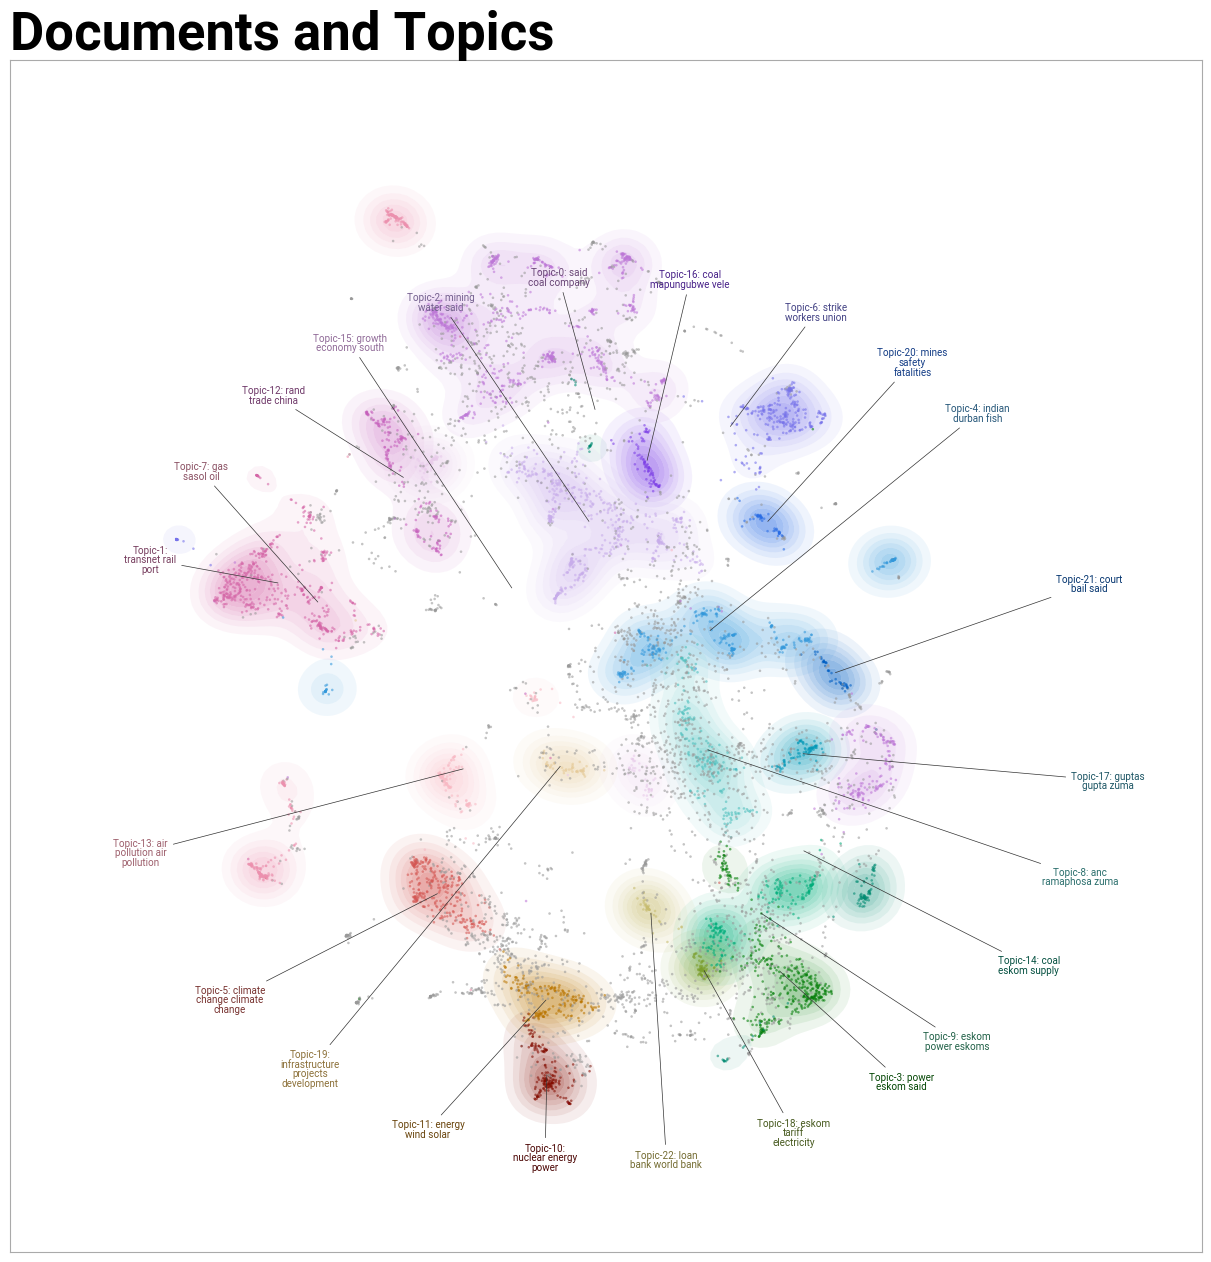

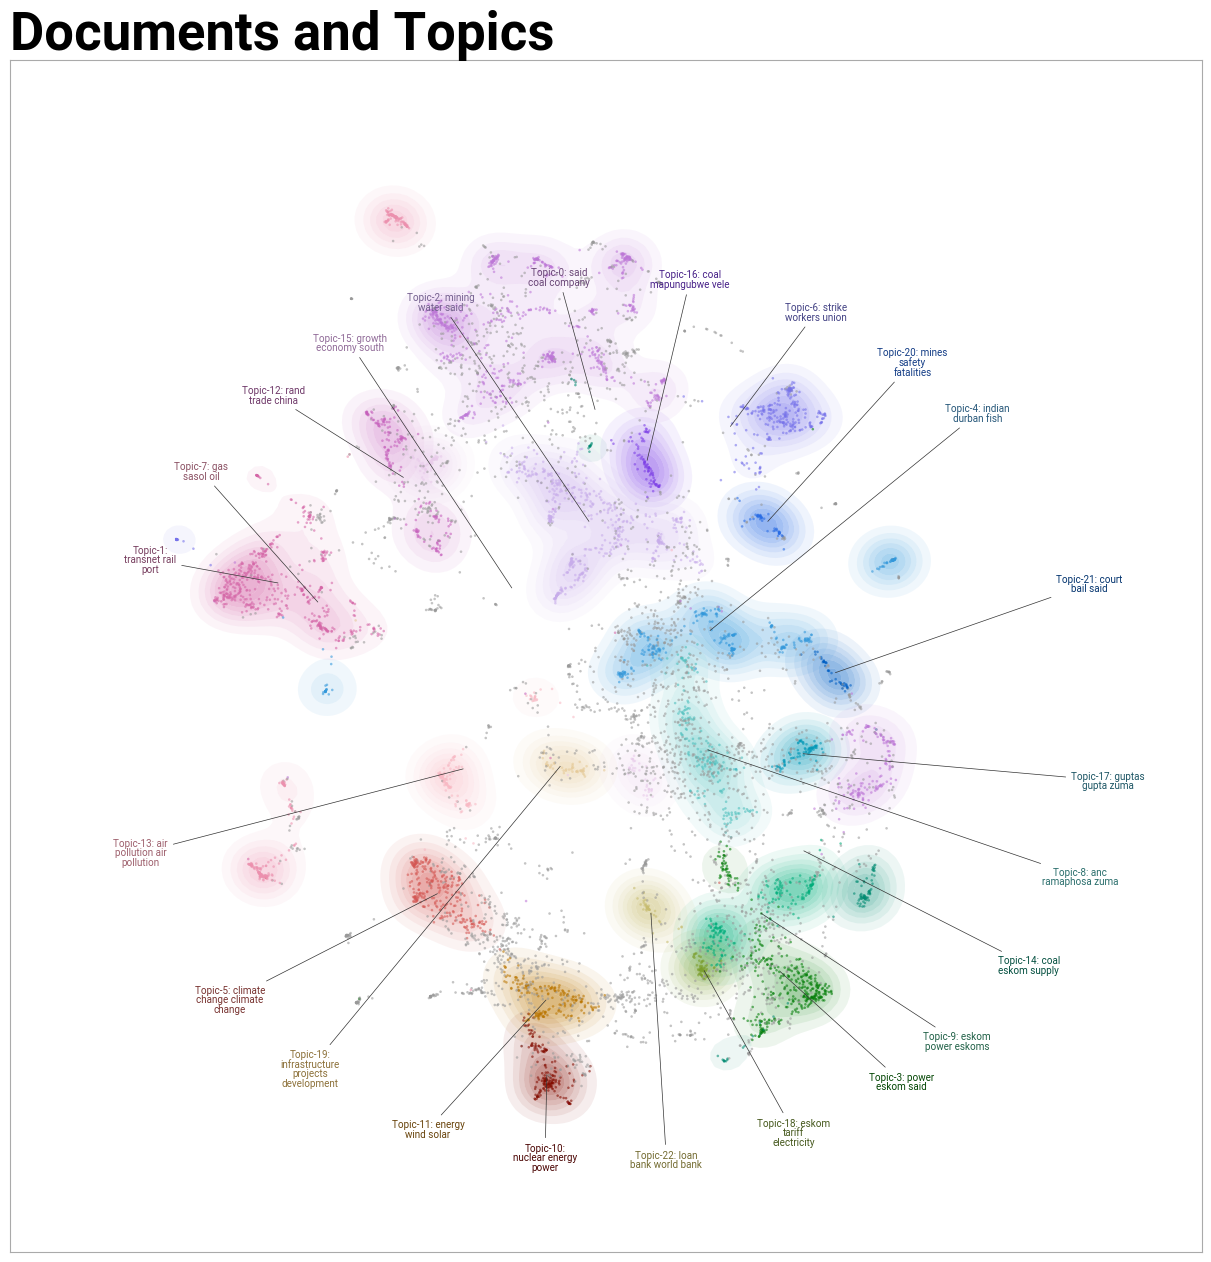

In [ ]:
topic_model.visualize_document_datamap(df_subset, reduced_embeddings=reduced_embeddings, custom_labels=custom_labels) # , custom_labels=custom_labels
# reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)


In [ ]:
embeddings=topic_model.embedding_model
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

topic_model.visualize_documents(df_subset, reduced_embeddings=reduced_embeddings)


TypeError: float() argument must be a string or a real number, not 'SentenceTransformerBackend'

In [ ]:


# Get the topics and their top 30 words
topics = topic_model.get_topics()

# Get the topic frequency to calculate the share
topic_freq = topic_model.get_topic_freq()
#topic_freq = topic_freq[topic_freq.Topic != -1]  # Exclude the outliers topic

# Create a DataFrame to store the topics, words, and topic share
data = []

for topic, words_scores in topics.items():
    if topic == -1:  # Skip the outliers topic
        continue
    words = [word for word, score in words_scores[:30]]
    share = topic_freq.loc[topic_freq.Topic == topic, 'Count'].values[0] / topic_freq['Count'].sum()
    data.append({'Topic': topic, 'Top 10 Words': ', '.join(words), 'Topic Share': share})

df_topics['Topic Share'] = df_topics['Topic Share'].apply(lambda x: f"{x:.2%}")


# Convert to DataFrame
df_topics = pd.DataFrame(data)
df_topics.to_csv("/content/drive/MyDrive/Colab Notebooks/bert_20_top_words.csv", index = False)
# Display the DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="Topics and Top 30 Words", dataframe=df_topics)

# Alternatively, print the DataFrame
print(df_topics)


    Topic                                       Top 10 Words  Topic Share
0       0  eskom, coal, load shedding, electricity, gupta...     0.104353
1       1  coal, company, mining, percent, shares, glenco...     0.094006
2       2  transnet, rail, coal, freight, ports, durban, ...     0.060063
3       3  anc, ramaphosa, zuma, south africa, minister, ...     0.039874
4       4  mining, industry, government, resources, envir...     0.037476
5       5  climate change, carbon, emissions, south afric...     0.036972
6       6  strike, workers, unions, platinum, labour, min...     0.033943
7       7  renewable energy, projects, eskom, coal, cost,...     0.025363
8       8  nuclear power, south africa, plan, electricity...     0.021703
9       9  sasol, prices, petrol, sa, coal, crude oil, fu...     0.016782
10     10  court, police, mining, application, trucks, ar...     0.015773
11     11  rand, inflation, exports, markets, rate, defic...     0.015647
12     12  pollution, air pollution, a

### Save updated topic model


In [ ]:
#import os#
#
# Path to save the model
#model_save_path = "/content/drive/MyDrive/Colab Notebooks/topic_model_20"

# Ensure the directory exists
#if not os.path.exists(os.path.dirname(model_save_path)):
#    os.makedirs(os.path.dirname(model_save_path))

# Save the model
#embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
#topic_model.save(model_save_path, serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

# Confirm the file was saved
#if os.path.exists(model_save_path):
#    print(f"Model successfully saved at {model_save_path}")
#else:
#    print("Failed to save the model. Please check the path and permissions.")

Model successfully saved at /content/drive/MyDrive/Colab Notebooks/topic_model_20


After having calculated our top n words per topic there might be many words that essentially mean the same thing. As a little bonus, we can use bertopic.representation.MaximalMarginalRelevance in BERTopic to diversify words in each topic such that we limit the number of duplicate words we find in each topic. This is done using an algorithm called Maximal Marginal Relevance which compares word embeddings with the topic embedding.

We do this by specifying a value between 0 and 1, with 0 being not at all diverse and 1 being completely diverse: